# Perceptron

In this notebook, we first briefly introduce the concept of single neuron perceptron model. Then we illustrate the perceptron algorithm. At last, we build a Python class in scratch and implement it on the CVDs dataset.

---

## Introduction

In machine learning, the [Perceptron](https://en.wikipedia.org/wiki/Perceptron) is an algorithm for supervised learning of binary classifiers. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The model structure is depicted in the figure below.

<p align="center">
    <img src="Perceptron.png">
</p>

---

## Algorithm
Before dive into the learning algorithm, We first define some required notation:

* $x^{(i)}$ is the p-dimensional input vector.
    - $x^{(i)}_0 = 1$, 
    - $x^{(i)}_j$ is the value of the j-th feature of the i-th training input vector.
* $y^{(i)}$ is the true label.
* $\eta$ is the learning rate.
* $\phi(z)$ is the activation function. 
* $\mathbf{w}_t$ is the weight vector at epoch t.

Typically, training the perceptron includes 3 steps.:

1. We initialize the weights $\mathbf{w}_0$. Weights may be initialized to 0 or to small random values.
2. We choose an activation function $\phi(z)$ and learning rate $\eta$. For each sample $x^{(i)}$ in the training dataset, performing the following steps:
    1. Calculate the actual output: $\widehat{y^{(i)}_t} = \phi(\mathbf{w}_t^{\top}x^{(i)})$.
    2. Update the weights: $\mathbf{w}_{t+1} = \mathbf{w}_t + \eta (y^{(i)} - \widehat{y^{(i)}_t})x^{(i)}$.
3. The 2nd step may be repeated until the iteration error is less than a specified error threshold, or a predetermined number of iterations has been completed.

Note that the activation function I chose in the algorithm was the sign funcction, which is

$$
\phi(z) = \begin{cases}
1&z>0,\\
-1&z<0.
\end{cases}
$$

---

## Coding
In this part, we first build a Perceptron Python Class. Then we implement it on the CVDs dataset.  At last, we do the performance analysis.

In [1]:
# Build the Perceptron class
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

We import the required libraries and the primary data set.

In [2]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart.csv")
df.head() #shows the first 5 rows of the dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


We preprocess the data set by onehot-encoding the categorical varaibles and standardizing the numerical variables.

In [3]:
# Data Preprocessing by onehot encoding
df.HeartDisease = df.HeartDisease.replace({0:-1})
df.Sex = df.Sex.replace({'M':1, 'F':0})
df.ExerciseAngina = df.ExerciseAngina.replace({'Y':1, 'N':0})

ChestPainType = pd.get_dummies(df.ChestPainType,drop_first=True)
RestingECG = pd.get_dummies(df.RestingECG,drop_first=True)
ST_Slope = pd.get_dummies(df.ST_Slope,drop_first=True)
df = pd.concat([df,ChestPainType, RestingECG, ST_Slope],axis=1)
df.drop(['ChestPainType', 'RestingECG', 'ST_Slope'],axis=1,inplace=True)

# Standardize the data
df.Age = preprocessing.scale(df.Age)
df.RestingBP = preprocessing.scale(df.RestingBP)
df.MaxHR = preprocessing.scale(df.MaxHR)
df.Cholesterol = preprocessing.scale(df.Cholesterol)

df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ATA,NAP,TA,Normal,ST,Flat,Up
0,-1.433140,1,0.410909,0.825070,0,1.382928,0,0.0,-1,1,0,0,1,0,0,1
1,-0.478484,0,1.491752,-0.171961,0,0.754157,0,1.0,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.525138,0,0.0,-1,1,0,0,0,1,0,1
3,-0.584556,0,0.302825,0.139040,0,-1.132156,1,1.5,1,0,0,0,1,0,1,0
4,0.051881,1,0.951331,-0.034755,0,-0.581981,0,0.0,-1,0,1,0,1,0,0,1


Then we define the response variables and exploratory variable. We split the date into training set and testing set.

In [4]:
X = df.drop('HeartDisease',axis=1).to_numpy()
y = df.HeartDisease

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

We create an instance of ```Perceptron``` Class and train it on the training set.

In [5]:
# Instantiate one instance of the Perceptron class
np.random.seed(2)
percep = Perceptron()

# Call the train method to train the weights and bias of the given instance
percep.train(X_train, y_train)

We visualize the misclassification number over each iteration.

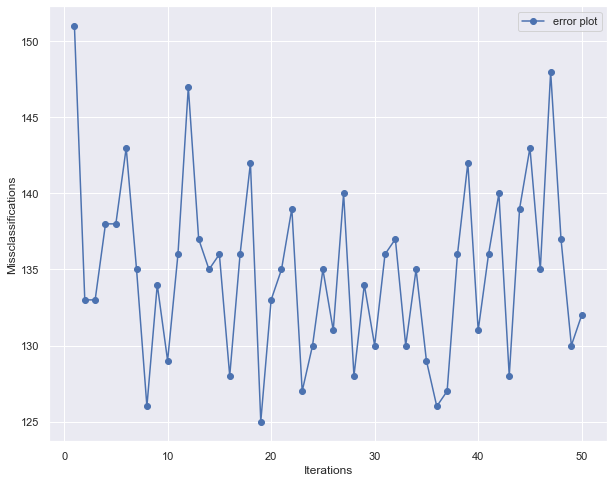

In [6]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

From the error plot, we can see that the misclassification number does not show a downward trend as the number of iterations increase. Now we make predictions on the training set and check the confusion matrix and classification report.

cf_matrix = [[ 51  61]
 [  7 157]] 



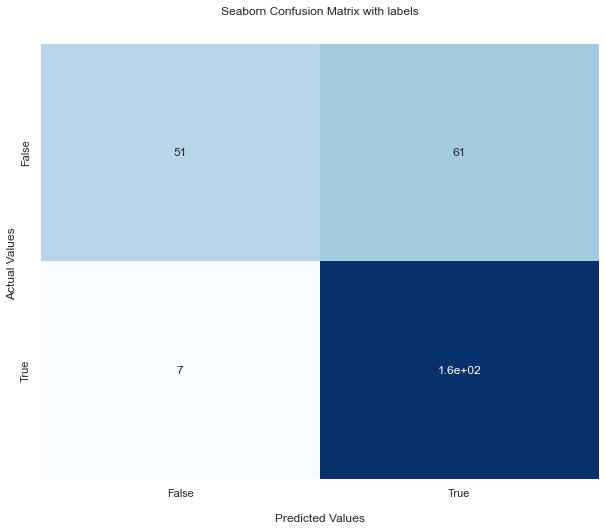

In [7]:
# Make predictions on testing data
y_pred = percep.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [8]:
#Check performance of our model with classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.88      0.46      0.60       112
           1       0.72      0.96      0.82       164

    accuracy                           0.75       276
   macro avg       0.80      0.71      0.71       276
weighted avg       0.78      0.75      0.73       276



The accuracy for our perceptron model is 75%. From the classification report, we can see that the recall for label = 1 is 96%, meaning that most of the observations with true label = 1 are classfied as label = 1; while for those label = -1, the recall is only 46%, which is almost the same as flipping a coin. Now let's try increasing the epoch number.

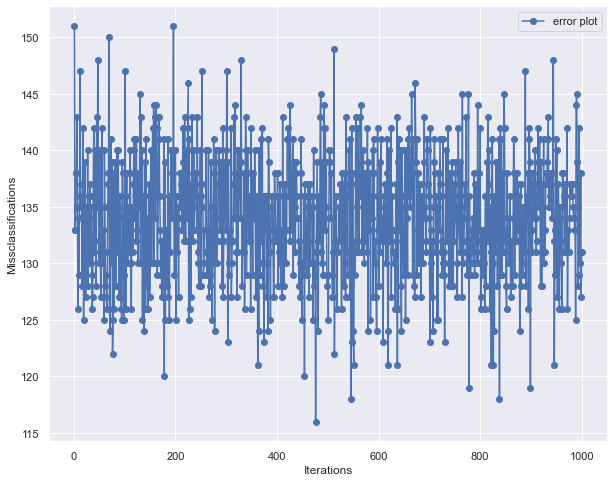

In [9]:
# What if we increase the epochs number to 1000?
np.random.seed(2)
percep2 = Perceptron(epochs=1000)
percep2.train(X_train, y_train)

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep2.errors_)+1), percep2.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

cf_matrix = [[ 73  39]
 [  9 155]] 



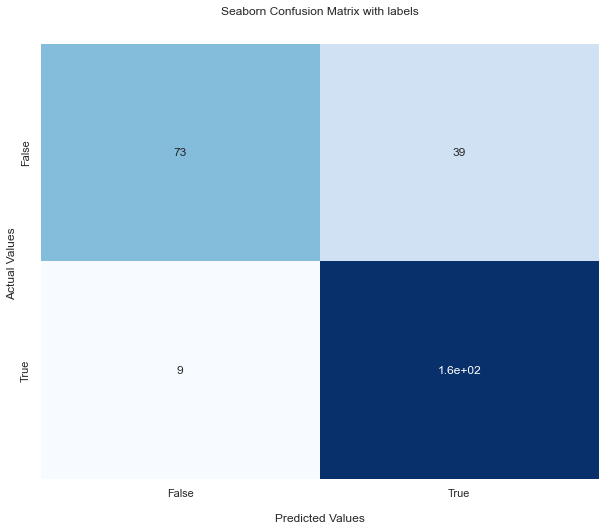

In [10]:
y_pred = percep2.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(f"cf_matrix = {cf_matrix} \n")

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [11]:
#Check performance of our model with classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.89      0.65      0.75       112
           1       0.80      0.95      0.87       164

    accuracy                           0.83       276
   macro avg       0.84      0.80      0.81       276
weighted avg       0.84      0.83      0.82       276



We can see that, by increasing epochs from 50 to 1000, the recall for negative examples increases, and the accuracy of model also increases to 83%. Now we do an experiment with different learning rates.

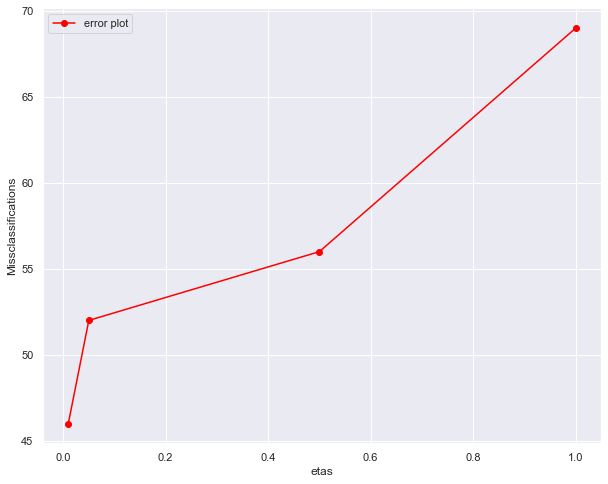

In [12]:
# Experiment with the learning rate
etas = [0.01, 0.05, 0.5, 1]
errors = []
np.random.seed(2)
for eta in etas:
    percep = Perceptron(eta = eta, epochs=1000)
    percep.train(X_train, y_train)
    y_pred = percep.predict(X_test)
    error = sum(y_pred != y_test)
    errors.append(error)

plt.figure(figsize = (10, 8))
plt.plot(etas, errors, 
         marker = "o",
         label = "error plot", color = 'red')
plt.xlabel("etas")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

The error plot shows an increasing trend. We will create a ```Perceptron``` with $\eta = .01$ and check its accuracy.

In [13]:
np.random.seed(2)
percep3 = Perceptron(eta = .01, epochs=1000)
percep3.train(X_train, y_train)
y_pred = percep3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.88      0.68      0.77       112
           1       0.81      0.94      0.87       164

    accuracy                           0.83       276
   macro avg       0.85      0.81      0.82       276
weighted avg       0.84      0.83      0.83       276



The result is almost the same as ``percep2``, while the recall for label = -1 increases a little. Now let's try perform single neuron perceptron using Scikit_Learn

In [16]:
import sklearn.linear_model as lm
per_clf = lm.Perceptron()
per_clf.fit(X_train, y_train)
y_pred = per_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.76      0.83      0.79       112
           1       0.88      0.82      0.85       164

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.82      0.82       276



The accuracy for ```Perceptron``` by Scikit-Learn is 82%, which is a little less than our scratch ```Perceptron```.

---
## Conclusion

The single neuron perceptron model has accuracy about 83% on the CVDs dataset. The error plot does not show apparent decreasing trend, instead, it oscillates around a value. The main reason is that the dataset is not linearly separable and the single neuron perceptron model only has good performance on separable data.